# Cleaning postulaciones

<a id = 'table'> </a>
## Table of contents

  [Key Points](#key)
- Part I - Gathering the data
    - [Converting DTA to CSV file](#dta)
    - [Reading the CSV file](#read)    

- Part II - Assessing and cleaning
    - [Making copies](#copies)
    - [Exploring the table](#explore)
    - [Assesment and cleaning](#clean)
    - [Storing Data](#store)
    
- Part III - Analysis and visualization
    - [¿Cuál es el porcentaje de colocación?](#colocacion)
    - [¿En cuáles programas se originan las postulaciones?](#programa)
    - [¿Qué proporciones tienen los diferentes vínculos?](#vinculo)

<a id='key'></a>
## Key Points for assessing and cleaning

- Aquí estableceremos lo que sabemos de antemano, las premisas, lo que nos interesa y lo que no

<a id='dta'></a>
[Return to Table of Contents](#table)
## Converting DTA to CSV file


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [3]:
# creamos my_stata_reader, un objeto que nos permite leer por chunks (trozos)
# encoding utf-8
my_stata_reader = pd.read_stata('BID2.POSTULACIONES.dta', chunksize=10000)
my_stata_reader._encoding = 'utf-8'

In [4]:
# obtenemos los nombres de las columnas y las escribimos en el csv
# este será el encabezado
my_string = ",".join(my_stata_reader.variable_labels() )    

# ‘r’ read. ‘w’ write. ‘a’ append. ‘r+’ read and write mode, which is used to handle both actions.
with open('postulaciones.csv','w') as file:
    file.write(my_string)   
    file.write('\n')        

In [5]:
# start y end medirán el tiempo
start = time.time()

# para cada chunk, hará lo siguiente:
for chunk in my_stata_reader:
    # filtrar cada chunk por `estatusfinalvinculo` y `anio`
    #one_chunk = chunk.loc[(chunk['estatusfinalvinculo']=='COLOCADO') &
    #                    (chunk['anio']>2016)]
    # anexar las filas del chunk al CSV ignorando el header
    chunk.to_csv('postulaciones.csv', mode='a', index=False, header=False)   #‘a’ append.
    # imprimir un punto cada que anexa un chunk
    print('.', end = '')
end = time.time()
print (('Total time: ') + str(end - start))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [6]:
# Verifiquemos el tamanio del CSV
filesize= os.stat('postulaciones.csv').st_size
print(filesize)

1603020948


<a id='read'></a>
[Return to Table of Contents](#table)
## Reading the CSV

The successful use of pd.read_csv may vary because of the <b>file size, type of processor, memory, code,</b> or some other variables.

If the code runs out of memory, you can try reading in chunks.

In [7]:
postulaciones = pd.read_csv('postulaciones.csv')
postulaciones.head(1)

,trac_id,id_solicitante,id_oferta_empleo,id_empresa,fecha_vinculo,tipo_vinculo,fechainiciovacante,fecha_finalvinculo,estatusfinalvinculo,subprograma,fuente,anio
0,12000.0,14902401.0,30309,11908.0,2016-02-13 14:05:27,INSCRIPCION,2016-03-13 00:00:00,2016-02-17 00:00:00,COLOCADO,MOV LAB INT,SISPAEW,2016


<a id='copies'></a>
[Return to Table of Contents](#table)
## Making copies

The first step before any cleaning is **always make copies**

In [23]:
postulaciones_clean = postulaciones.copy()

<a id='explore'></a>
[Return to Table of Contents](#table)
## Exploring the table


In [4]:
postulaciones_clean.head()

,trac_id,id_solicitante,id_oferta_empleo,id_empresa,fecha_vinculo,tipo_vinculo,fechainiciovacante,fecha_finalvinculo,estatusfinalvinculo,subprograma,fuente,anio
0,0.0,1.198323e+09,3179751,15079350.0,2017-08-18 00:00:00,PUSTULACIÃN,2017-08-17 00:00:00,2017-11-20 00:00:10,NO COLOCADO,PORTAL,SVL,2017
1,0.0,9.774188e+08,2995863,77042.0,2017-05-04 00:00:00,PUSTULACIÃN,2017-05-03 00:00:00,2017-08-03 04:01:05,NO COLOCADO,PORTAL,SVL,2017
2,0.0,1.144184e+09,3082566,15566424.0,2017-07-01 00:00:00,PUSTULACIÃN,2017-06-21 00:00:00,2017-09-30 13:54:38,NO COLOCADO,PORTAL,SVL,2017
3,0.0,8.089237e+08,3105248,147780.0,2017-07-14 00:00:00,PUSTULACIÃN,2017-07-03 00:00:00,2017-10-13 04:01:27,NO COLOCADO,PORTAL,SVL,2017
4,0.0,8.588266e+08,3138907,24086.0,2017-08-01 00:00:00,PUSTULACIÃN,2018-04-02 00:00:00,2017-11-11 00:03:17,NO COLOCADO,PORTAL,SVL,2017


In [5]:
postulaciones_clean.nunique()

trac_id                     66
id_solicitante         1423232
id_oferta_empleo        723911
id_empresa              112753
fecha_vinculo             1157
tipo_vinculo                 3
fechainiciovacante         989
fecha_finalvinculo     1502944
estatusfinalvinculo          2
subprograma                  7
fuente                       2
anio                         2
dtype: int64

In [6]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283233 entries, 0 to 6283232
Data columns (total 12 columns):
trac_id                float64
id_solicitante         float64
id_oferta_empleo       int64
id_empresa             float64
fecha_vinculo          object
tipo_vinculo           object
fechainiciovacante     object
fecha_finalvinculo     object
estatusfinalvinculo    object
subprograma            object
fuente                 object
anio                   int64
dtypes: float64(3), int64(2), object(7)
memory usage: 575.2+ MB


In [1]:
6283233 - 6283155

78

In [7]:
postulaciones['trac_id'].value_counts()

0.0        6283155
37692.0          6
79508.0          5
66947.0          2
244.0            2
32462.0          2
75247.0          2
11847.0          1
11890.0          1
11947.0          1
32731.0          1
33600.0          1
33540.0          1
2963.0           1
33649.0          1
33806.0          1
33931.0          1
33939.0          1
7567.0           1
1558.0           1
2962.0           1
1637.0           1
34358.0          1
1112.0           1
1108.0           1
1099.0           1
869.0            1
640.0            1
463.0            1
366.0            1
            ...   
34879.0          1
80227.0          1
79755.0          1
75747.0          1
75702.0          1
75637.0          1
75534.0          1
75101.0          1
75067.0          1
66882.0          1
66645.0          1
56319.0          1
56271.0          1
56178.0          1
55889.0          1
55887.0          1
53544.0          1
53386.0          1
53304.0          1
38790.0          1
38382.0          1
38135.0     

In [8]:
postulaciones[postulaciones['trac_id']==0]['fuente'].unique()

array(['SVL'], dtype=object)

Todas las postulaciones con `trac_id` = 0, tienen una única fuente: SVL

In [9]:
postulaciones[postulaciones['trac_id']!=0]['fuente'].unique()

array(['SISPAEW'], dtype=object)

Todas las postulaciones con `trac_id` diferente de 0, tienen una única fuente: SISPAEW

In [10]:
postulaciones['tipo_vinculo'].unique()

array(['PUSTULACIÃ\x93N', 'ENVÃ\x8dO', 'INSCRIPCION'], dtype=object)

Hay 3 tipos de vínculos: postulación, envío e inscripción. Hay que arreglar los textos

<a id='clean'></a>
[Return to Table of Contents](#table)
## Assesment and cleaning
#### Quality changes
1. [Not relevant columns must be removed](#drop_cols)
2. ['trac_id','id_solicitante', and 'id_empresa' have wrong datatype](#to_int)
3. ['tipo_vinculo' values have errors from the encoding](#tipo_vinculo) 

#### Tidiness changes
Not a single so far.

<a id='drop_cols'></a>
### 1. Not relevant columns must be removed
The columns `fechainiciovacante, fecha_finalvinculo, fuente` are not relevant for the final research. These columns will be deleted with the df.drop function

In [24]:
# where 1 is the axis number (0 for rows and 1 for columns.)
postulaciones_clean = postulaciones_clean.drop(['fechainiciovacante', 'fecha_finalvinculo', 'fuente'],1)

# Verify the selected columns have been removed 
postulaciones_clean.columns.get_values()

array(['trac_id', 'id_solicitante', 'id_oferta_empleo', 'id_empresa',
       'fecha_vinculo', 'tipo_vinculo', 'estatusfinalvinculo',
       'subprograma', 'anio'], dtype=object)

<a id='to_int'></a>
### 2. 'trac_id','id_solicitante', and 'id_empresa' have wrong datatype
Must be changed from float64 to int

In [25]:
postulaciones_clean['trac_id'] =  postulaciones_clean['trac_id'].astype(int)
postulaciones_clean['id_solicitante'] =  postulaciones_clean['id_solicitante'].astype(int)
postulaciones_clean['id_empresa'] =  postulaciones_clean['id_empresa'].astype(int)

In [26]:
# Verify new datatype
postulaciones_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283233 entries, 0 to 6283232
Data columns (total 9 columns):
trac_id                int64
id_solicitante         int64
id_oferta_empleo       int64
id_empresa             int64
fecha_vinculo          object
tipo_vinculo           object
estatusfinalvinculo    object
subprograma            object
anio                   int64
dtypes: int64(5), object(4)
memory usage: 431.4+ MB


<a id='tipo_vinculo'></a>
### 3. tipo_vinculo values have errors from the encoding
Write 'POSTULACION' instead of 'PUSTULACIÃ\x93N' and 'ENVIO' instead of 'ENVÃ\x8dO'. 

Use the replace function and regular expressions (regex)

In [33]:
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'(PUSTULAC).*(N)$'}, {'tipo_vinculo':'POSTULACIÓN'}, regex=True)
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'(ENV).*(O)$'}, {'tipo_vinculo':'ENVÍO'}, regex=True)
postulaciones_clean = postulaciones_clean.replace({'tipo_vinculo':r'INSCRIPCION'}, {'tipo_vinculo':'INSCRIPCIÓN'}, regex=True)

In [34]:
# Verify tipo_vinculo
postulaciones_clean['tipo_vinculo'].unique()

array(['POSTULACIÓN', 'ENVÍO', 'INSCRIPCIÓN'], dtype=object)

<a id='store'></a>
[Return to Table of Contents](#table)
## Storing Data

First, we'll get a sample of `postulaciones` to verify it is the way we need it.

In [45]:
postulaciones_clean.sample(5)

,trac_id,id_solicitante,id_oferta_empleo,id_empresa,fecha_vinculo,tipo_vinculo,estatusfinalvinculo,subprograma,anio
3224398,0,1187756002,2714017,15507290,2016-11-14 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
2649748,0,1095811502,2535242,15444673,2016-08-22 00:00:00,POSTULACIÓN,NO COLOCADO,SIISNE,2016
4107751,0,789287302,2498729,15422330,2016-07-25 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
963955,0,668813902,2604158,15097325,2016-09-17 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2016
5309524,0,1057416702,2654024,15486132,2016-10-18 00:00:00,POSTULACIÓN,COLOCADO,FERIAS,2016


Then proceed to save it. Make sure to specify index=False and utf-8 encoding.

utf-8 ensures that special characters in Spanish as accents and ñ will be saved.

In [36]:
postulaciones_clean.to_csv('postulaciones_clean.csv', index=False, encoding='utf-8')

<a id='colocacion'></a>
[Return to Table of Contents](#table)
## Analysis and visualization
After wrangling and cleaning data from `postulaciones` we can try some univariate exploration.

In this first attempt we are not adding the gender variable yet.

In [5]:
# Run this line if you don't have the dataframe postulaciones_clean
postulaciones_clean = pd.read_csv('postulaciones_clean.csv', encoding='utf-8')

,trac_id,id_solicitante,id_oferta_empleo,id_empresa,fecha_vinculo,tipo_vinculo,estatusfinalvinculo,subprograma,anio
0,0,1198322602,3179751,15079350,2017-08-18 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2017
1,0,977418802,2995863,77042,2017-05-04 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2017
2,0,1144183502,3082566,15566424,2017-07-01 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2017
3,0,808923702,3105248,147780,2017-07-14 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2017
4,0,858826602,3138907,24086,2017-08-01 00:00:00,POSTULACIÓN,NO COLOCADO,PORTAL,2017


### ¿Cuál es el porcentaje de colocación?

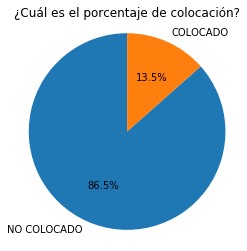

In [3]:
postulaciones_clean['estatusfinalvinculo'].value_counts().plot(kind = 'pie', startangle=90, autopct='%1.1f%%')
plt.axis('square')
plt.title('¿Cuál es el porcentaje de colocación?')
plt.ylabel('');

<a id='programa'></a>
[Return to Table of Contents](#table)
### ¿En cuáles programas se originan las postulaciones?


In [4]:
subprogramas_count = postulaciones_clean['subprograma'].value_counts()
subprogramas_count

PORTAL               4840986
SIISNE               1246746
FERIAS                191840
Abriendo Espacios       3565
BECATE                    49
MOV LAB INT               29
OTRO                      18
Name: subprograma, dtype: int64

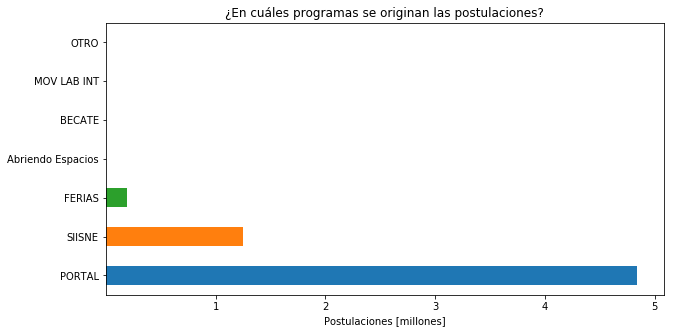

In [7]:
subprogramas_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿En cuáles programas se originan las postulaciones?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 5000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5]
plt.xticks(xticklocs, xticknames);

<a id='vinculo'></a>
[Return to Table of Contents](#table)
### ¿Qué proporciones tienen los diferentes vínculos?


In [13]:
vinculos_count = postulaciones_clean['tipo_vinculo'].value_counts()
vinculos_count

POSTULACIÓN    5897688
ENVÍO           385467
INSCRIPCIÓN         78
Name: tipo_vinculo, dtype: int64

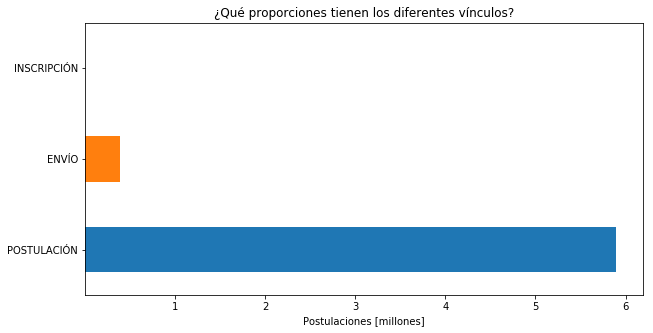

In [16]:
vinculos_count.plot(kind = 'barh', figsize=(10,5))
plt.title('¿Qué proporciones tienen los diferentes vínculos?')
plt.xlabel('Postulaciones [millones]')
xticklocs = np.arange(1000000, 6000001, 1000000) #(start of interval, end of interval, spacing between values)
xticknames = [1,2,3,4,5,6]
plt.xticks(xticklocs, xticknames);

## References
Maximum size of pandas dataframe
- https://stackoverflow.com/questions/23569771/maximum-size-of-pandas-dataframe

Regex
- https://regexone.com/
- https://stackoverflow.com/questions/9947038/how-can-i-match-the-start-and-end-in-pythons-regex
